# Inverse distance weighting (IDW) 
- One of Geographic information system interpolation
- Goal : (latitude, longitude, air pollution <- interpolation!)

## 1. Import Packages

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import idw
from mpl_toolkits.mplot3d import Axes3D

## 2. Ground Truth

In [2]:
# create sample points with structured scores
X1 = 10 * np.random.rand(1000, 2) -5

In [8]:
print("Shape :", X1.shape)
print("MAX :", np.max(X1))
print("MIN :", np.min(X1))

Shape : (1000, 2)
MAX : 4.995676710366645
MIN : -4.995366287593649


In [9]:
def func(x, y):
    return np.sin(x**2 + y**2) / (x**2 + y**2)

In [50]:
z1 = func(X1[:,0], X1[:,1])
print(z1.shape)

(1000,)


## 3. Train and Test

In [12]:
idw_tree = idw.tree(X1, z1)

In [53]:
spacing = np.linspace(-5., 5., 100)
X2 = np.meshgrid(spacing, spacing)
np.shape(X2)

(2, 100, 100)

In [54]:
grid_shape = X2[0].shape

In [55]:
X2 = np.reshape(X2, (2, -1)).T
X2.shape

(10000, 2)

In [56]:
z2 = idw_tree(X2)

In [57]:
z2.shape

(10000,)

## 4. Results

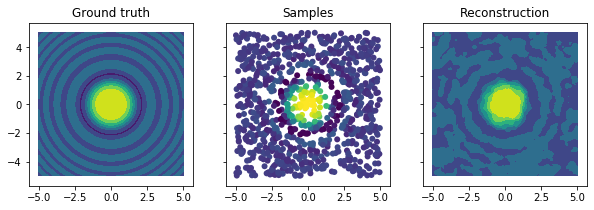

In [59]:
# plot
fig, (ax1, ax2, ax3) = plt.subplots(1,3, sharex=True, sharey=True, figsize=(10,3))

ax1.contourf(spacing, spacing, func(*np.meshgrid(spacing, spacing)))
ax1.set_title('Ground truth')

ax2.scatter(X1[:,0], X1[:,1], c=z1, linewidths=0)
ax2.set_title('Samples')

ax3.contourf(spacing, spacing, z2.reshape(grid_shape))
ax3.set_title('Reconstruction')
plt.show()

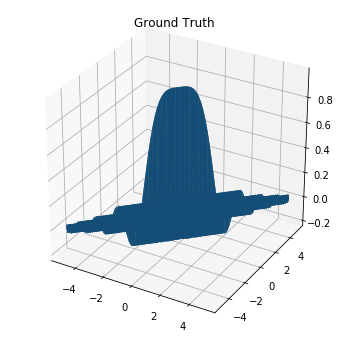

In [61]:
plt.rcParams["figure.figsize"] = (6,6)
fig = plt.figure()
ax1 = fig.gca(projection = '3d')
ax1.plot_surface(spacing, spacing, func(*np.meshgrid(spacing, spacing)))

plt.title("Ground Truth")
plt.show()

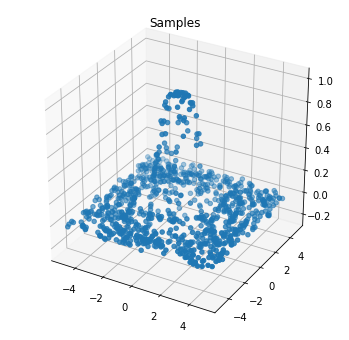

In [62]:
fig = plt.figure()
ax2 = fig.gca(projection = '3d')
ax2.scatter(X1[:,0], X1[:,1], z1)

plt.title("Samples")
plt.show()

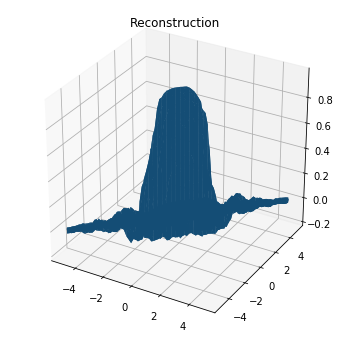

In [63]:
fig = plt.figure()
ax3 = fig.gca(projection = '3d')
ax3.plot_surface(spacing, spacing, z2.reshape(grid_shape))

plt.title("Reconstruction")
plt.show()

### Reference
- [1] [inverse_distance_weighting], https://github.com/paulbrodersen/inverse_distance_weighting/blob/master/LICENSE